# Exercícios

Utilizando a plotagem com pandas, reproduzam as visualizações abaixo, tentando deixá-las o mais próximas quanto possível da maneira como estão postas. Para isso, atentem-se às personalizações dos gráficos, como títulos, legendas, eixos e outros tipos possíveis de formatações e preferências de visualizações dos dados. Também é interessante que vocês discutam possíveis pontos de melhorias dessas visualizações!

**Exercício 1.** Reproduza o gráfico de barras abaixo, em que cada barra representa um dos 10 países com mais casos confirmados de COVID no dataset, e a "quebra" em cada cor indica a predominância de casos confirmados em cada mês.

In [1]:
import pandas as pd
import datetime

In [4]:
df = pd.read_csv('Covid_19_Countrywise_timeseries.csv')
df['date'] = pd.to_datetime(df['ObservationDate'])
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,date,month
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2020-02-28,2
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,2020-03-10,3
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0,2020-02-24,2
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-25,2
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-26,2


In [18]:
df['date'] = pd.to_datetime(df['ObservationDate'])
df['month'] = pd.DatetimeIndex(df['date']).month

In [6]:
matriz_agregacao = pd.pivot_table(df, values = 'New Confirmed', index = 'country', columns = 'month', aggfunc = 'sum').fillna(0)
matriz_agregacao
#precisa ter a coluna com ano e mês e dai usar no columns acima

month,1,2,3
country,,,
azerbaijan,0.0,0.0,0.0
"('st. martin',)",0.0,0.0,2.0
afghanistan,0.0,1.0,109.0
albania,0.0,0.0,197.0
algeria,0.0,1.0,453.0
...,...,...,...
venezuela,0.0,0.0,119.0
vietnam,2.0,14.0,158.0
west bank and gaza,0.0,0.0,98.0


<Axes: ylabel='country'>

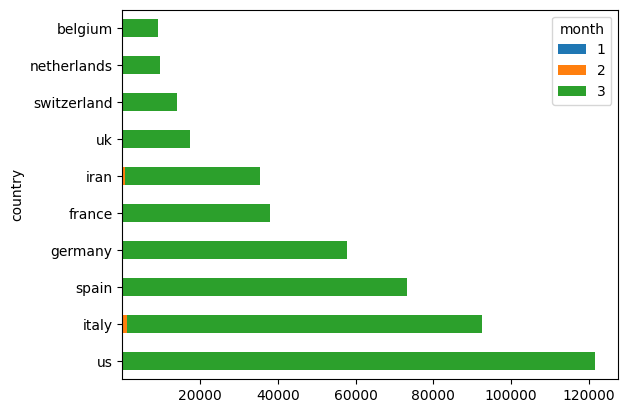

In [22]:
matriz_agregacao.plot(kind='barh', stacked=True)

In [19]:
#outra opção
df.groupby(['country', 'month'])['New Confirmed'].sum().unstack().fillna(0)
# também precisa ter a coluna com ano e mês e dai usar no lugar de month acima

month,1,2,3
country,,,
azerbaijan,0.0,0.0,0.0
"('st. martin',)",0.0,0.0,2.0
afghanistan,0.0,1.0,109.0
albania,0.0,0.0,197.0
algeria,0.0,1.0,453.0
...,...,...,...
venezuela,0.0,0.0,119.0
vietnam,2.0,14.0,158.0
west bank and gaza,0.0,0.0,98.0


<AxesSubplot:ylabel='country'>

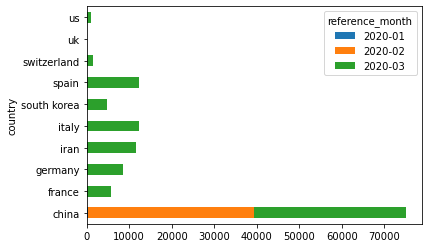

In [145]:
# o que se espera de output

Para os exercícios abaixo, vamos trabalhar com um dataset de [emissão de CO2 por país, ao longo do tempo](https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country).

**Exercício 2.** Reproduza o gráfico de linhas abaixo, que representa a série temporal da evolução de emissões de CO2 no Brasil.

In [23]:
df_2 = pd.read_csv('co2_emissions_kt_by_country.csv')
df_2.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


<AxesSubplot: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

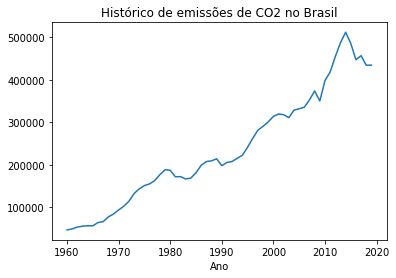

In [7]:
# output esperado

<Axes: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

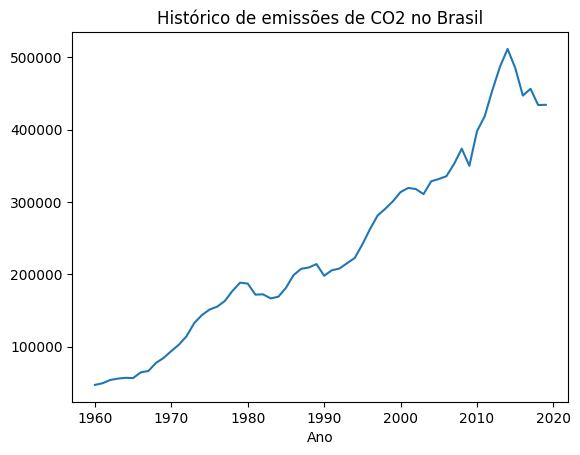

In [8]:
df_2[df_2['country_name']=='Brazil'].plot(title = 'Histórico de emissões de CO2 no Brasil', x = 'year', y = 'value', xlabel = 'Ano', legend = False)

**Exercício 3**. Uma visualização muito similar à anterior, mas com a adição da média global de emissão de CO2 (o Brasil deve ser incluído na linha da média global?).

<Axes: title={'center': 'Histórico de emissões de CO2 no Brasil versus Média Global'}, xlabel='year', ylabel='teste'>

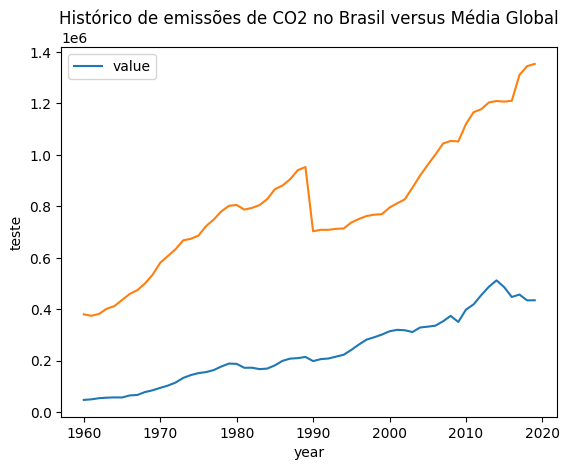

In [12]:
ax = df_2[df_2['country_name']=='Brazil'].plot(title = 'Histórico de emissões de CO2 no Brasil versus Média Global', x = 'year', y = 'value', xlabel = 'Ano')

df_2.groupby('year')['value'].mean().plot(ax = ax, l)

<Axes: >

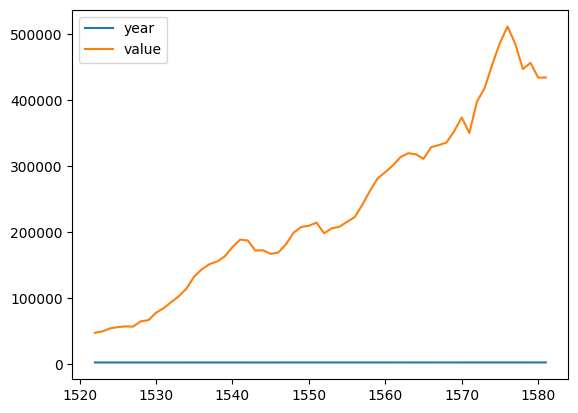

In [24]:
# outra opção (ele já imprime as duas, mas precisa ter a coluna com a média global)
df_2[df_2['country_name']=='Brazil'].plot()

**Exercício 4.** Os 10 países que mais aumentaram, percentualmente, a emissão de CO2 entre os anos de 2018 e 2019, na forma de um gráfico de barras horizontal.

In [ ]:
# pra ter o top 10 usa o sort_values e depois uns slice [0:10], tipo exercicio 1

In [16]:
df_2.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [59]:
# filtrar apenas para aparecer info de países que tenham dados em 2018 e 2019
df_2018 = df_2.loc[(df_2['year']==2018)]
df_2019 = df_2.loc[(df_2['year']==2019)]
df_2019
# country_name tem 239 em ambos os datasets de ano

,country_code,country_name,year,value
116,AFE,Africa Eastern and Southern,2019,603030.016154
176,AFG,Afghanistan,2019,6079.999924
236,AFW,Africa Western and Central,2019,220740.000024
296,AGO,Angola,2019,25209.999084
356,ALB,Albania,2019,4829.999924
...,...,...,...,...
13711,WSM,Samoa,2019,300.000012
13780,YEM,"Yemen, Rep.",2019,11100.000381
13840,ZAF,South Africa,2019,439640.014648
13896,ZMB,Zambia,2019,6800.000191


In [54]:
df_2018['country_name'].unique().tolist() == df_2019['country_name'].unique().tolist()

True

In [82]:
float(df_2019.loc[df_2019['country_name'] == 'Angola', 'value'])

25209.9990844727

In [85]:
( float(df_2019.loc[df_2019['country_name'] == 'Angola', 'value']) / float(df_2018.loc[df_2018['country_name'] == 'Angola', 'value']))*100 - 100

5.217028579980479

In [89]:
countries_list = df_2018['country_name'].unique().tolist()

dict_teste = {}

for country in countries_list:
    perc = (float(df_2019.loc[df_2019['country_name'] == country, 'value']) / float(df_2018.loc[df_2018['country_name'] == country, 'value']))*100 - 100
    dict_teste[country] = perc




32.60436974311949

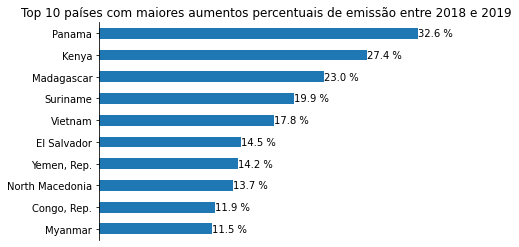

In [77]:
# output esperado